# Data exploration and analysis

In [1]:
path = ".."

import sys
sys.path.insert(0, path)

In [2]:
import warnings
warnings.filterwarnings('ignore')

    
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

## Train dataset

In [5]:
from problem import get_train_data

data_train, labels_train = get_train_data(path=path)

In [6]:
data_train.head()

participants_site participants_sex  participants_age  \
subject_id                                                                   
1932355398536124106                   5                F          9.301370   
5174041730092253771                  19                M         29.000000   
10219322676643534800                 19                F         45.000000   
10645466564919190227                  5                F          9.216438   
14512541342641936232                 28                M         15.050000   

                      anatomy_lh_bankssts_area  \
subject_id                                       
1932355398536124106                      977.0   
5174041730092253771                     1279.0   
10219322676643534800                     926.0   
10645466564919190227                     983.0   
14512541342641936232                    1488.0   

                      anatomy_lh_caudalanteriorcingulate_area  \
subject_id                                                      
1932355398536124106                                     427.0   
5174041730092253771                                     730.0   
10219322676643534800                                    446.0   
10645466564919190227                                    588.0   
14512541342641936232                                    593.0   

                      anatomy_lh_caudalmiddlefrontal_area  \
subject_id                                                  
1932355398536124106                                1884.0   
5174041730092253771                                2419.0   
10219322676643534800                               1897.0   
10645466564919190227                               2479.0   
14512541342641936232                               2309.0   

                      anatomy_lh_cuneus_area  anatomy_lh_entorhinal_area  \
subject_id                                                                 
1932355398536124106                   1449.0                       463.0   
5174041730092253771                   1611.0                       467.0   
10219322676643534800                  2135.0                       570.0   
10645466564919190227                  1312.0                       525.0   
14512541342641936232                  1829.0                       726.0   

                      anatomy_lh_fusiform_area  \
subject_id                                       
1932355398536124106                     2790.0   
5174041730092253771                     3562.0   
10219322676643534800                    3064.0   
10645466564919190227                    3766.0   
14512541342641936232                    3720.0   

                      anatomy_lh_inferiorparietal_area     ...       \
subject_id                                                 ...        
1932355398536124106                             4091.0     ...        
5174041730092253771                             5380.0     ...        
10219322676643534800                            4834.0     ...        
10645466564919190227                            5091.0     ...        
14512541342641936232                            5432.0     ...        

                      anatomy_select  \
subject_id                             
1932355398536124106                1   
5174041730092253771                1   
10219322676643534800               1   
10645466564919190227               1   
14512541342641936232               1   

                                                           fmri_basc064  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc064/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc064/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc064/10219322676643534800/run_1...   
10645466564919190227  ./data/fmri/basc064/10645466564919190227/run_1...   
14512541342641936232  ./data/fmri/basc064/14512541342641936232/run_1...   

                                                   

In [7]:
data = pd.concat([data_train, pd.Series(labels_train, index=data_train.index, name='target')], axis=1)

In [8]:
data.head()

participants_site participants_sex  participants_age  \
subject_id                                                                   
1932355398536124106                   5                F          9.301370   
5174041730092253771                  19                M         29.000000   
10219322676643534800                 19                F         45.000000   
10645466564919190227                  5                F          9.216438   
14512541342641936232                 28                M         15.050000   

                      anatomy_lh_bankssts_area  \
subject_id                                       
1932355398536124106                      977.0   
5174041730092253771                     1279.0   
10219322676643534800                     926.0   
10645466564919190227                     983.0   
14512541342641936232                    1488.0   

                      anatomy_lh_caudalanteriorcingulate_area  \
subject_id                                                      
1932355398536124106                                     427.0   
5174041730092253771                                     730.0   
10219322676643534800                                    446.0   
10645466564919190227                                    588.0   
14512541342641936232                                    593.0   

                      anatomy_lh_caudalmiddlefrontal_area  \
subject_id                                                  
1932355398536124106                                1884.0   
5174041730092253771                                2419.0   
10219322676643534800                               1897.0   
10645466564919190227                               2479.0   
14512541342641936232                               2309.0   

                      anatomy_lh_cuneus_area  anatomy_lh_entorhinal_area  \
subject_id                                                                 
1932355398536124106                   1449.0                       463.0   
5174041730092253771                   1611.0                       467.0   
10219322676643534800                  2135.0                       570.0   
10645466564919190227                  1312.0                       525.0   
14512541342641936232                  1829.0                       726.0   

                      anatomy_lh_fusiform_area  \
subject_id                                       
1932355398536124106                     2790.0   
5174041730092253771                     3562.0   
10219322676643534800                    3064.0   
10645466564919190227                    3766.0   
14512541342641936232                    3720.0   

                      anatomy_lh_inferiorparietal_area   ...    \
subject_id                                               ...     
1932355398536124106                             4091.0   ...     
5174041730092253771                             5380.0   ...     
10219322676643534800                            4834.0   ...     
10645466564919190227                            5091.0   ...     
14512541342641936232                            5432.0   ...     

                                                           fmri_basc064  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc064/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc064/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc064/10219322676643534800/run_1...   
10645466564919190227  ./data/fmri/basc064/10645466564919190227/run_1...   
14512541342641936232  ./data/fmri/basc064/14512541342641936232/run_1...   

                                                           fmri_basc122  \
subject_id                                                                
1932355398536124106   ./data/fmri/basc122/1932355398536124106/run_1/...   
5174041730092253771   ./data/fmri/basc122/5174041730092253771/run_1/...   
10219322676643534800  ./data/fmri/basc122/10219322676643534800/run_

In [9]:
report = pandas_profiling.ProfileReport(data)

In [10]:
report

In [15]:
description = report.get_description()

desc_variables = description['variables']

In [63]:
desc_variables.loc['anatomy_rhSurfaceHoles', :]

type                                 CORR
correlation_var    anatomy_lhSurfaceHoles
correlation                      0.947697
count                                 NaN
distinct_count                        NaN
is_unique                             NaN
memorysize                            NaN
mode                                  NaN
n_infinite                            NaN
n_missing                             NaN
p_infinite                            NaN
p_missing                             NaN
p_unique                              NaN
top                                   NaN
freq                                  NaN
mean                                  NaN
25%                                   NaN
5%                                    NaN
50%                                   NaN
75%                                   NaN
95%                                   NaN
cv                                    NaN
histogram                             NaN
iqr                               

In [37]:
const_features = desc_variables[desc_variables['type'] == 'CONST'].index.values.tolist()
const_features

['anatomy_Left-WM-hypointensities',
 'anatomy_Left-non-WM-hypointensities',
 'anatomy_Right-WM-hypointensities',
 'anatomy_Right-non-WM-hypointensities']

In [43]:
almost_zero_features = desc_variables[(desc_variables['type'] == 'NUM') & (desc_variables['p_zeros'] > 0.90)].index.values.tolist()
almost_zero_features

['anatomy_5th-Ventricle', 'anatomy_non-WM-hypointensities']

In [57]:
corr_features = desc_variables[(desc_variables['type'] == 'CORR')]['correlation_var']
corr_features

anatomy_BrainSegVolNotVent                 anatomy_SupraTentorialVolNotVentVox
anatomy_BrainSegVolNotVentSurf                   anatomy_rh_WhiteSurfArea_area
anatomy_CerebralWhiteMatterVol                anatomy_rhCerebralWhiteMatterVol
anatomy_CortexVol                                          anatomy_rhCortexVol
anatomy_Right-Caudate                                     anatomy_Left-Caudate
anatomy_Right-Cerebellum-Cortex                 anatomy_Left-Cerebellum-Cortex
anatomy_Right-Putamen                                     anatomy_Left-Putamen
anatomy_Right-VentralDC                                 anatomy_Left-VentralDC
anatomy_SubCortGrayVol                                     anatomy_BrainSegVol
anatomy_SupraTentorialVol                       anatomy_BrainSegVolNotVentSurf
anatomy_SupraTentorialVolNotVent                     anatomy_SupraTentorialVol
anatomy_SupraTentorialVolNotVentVox                     anatomy_SubCortGrayVol
anatomy_SurfaceHoles                                

In [58]:
m = (desc_variables['type'] == 'CORR') & (desc_variables['correlation_var'].str.contains(r"(rh|lh|Left|Right)"))

corr_left_rigth_features = desc_variables[m]['correlation_var']
corr_left_rigth_features

anatomy_BrainSegVolNotVentSurf                   anatomy_rh_WhiteSurfArea_area
anatomy_CerebralWhiteMatterVol                anatomy_rhCerebralWhiteMatterVol
anatomy_CortexVol                                          anatomy_rhCortexVol
anatomy_Right-Caudate                                     anatomy_Left-Caudate
anatomy_Right-Cerebellum-Cortex                 anatomy_Left-Cerebellum-Cortex
anatomy_Right-Putamen                                     anatomy_Left-Putamen
anatomy_Right-VentralDC                                 anatomy_Left-VentralDC
anatomy_SurfaceHoles                                    anatomy_rhSurfaceHoles
anatomy_rhCerebralWhiteMatterVol              anatomy_lhCerebralWhiteMatterVol
anatomy_rhCortexVol                                        anatomy_lhCortexVol
anatomy_rhSurfaceHoles                                  anatomy_lhSurfaceHoles
anatomy_rh_MeanThickness_thickness          anatomy_lh_MeanThickness_thickness
anatomy_rh_WhiteSurfArea_area                    ana

In [60]:
[(f1, f2) for f1, f2 in zip(corr_left_rigth_features.index.values.tolist(), corr_left_rigth_features.values.tolist())]

[('anatomy_BrainSegVolNotVentSurf', 'anatomy_rh_WhiteSurfArea_area'),
 ('anatomy_CerebralWhiteMatterVol', 'anatomy_rhCerebralWhiteMatterVol'),
 ('anatomy_CortexVol', 'anatomy_rhCortexVol'),
 ('anatomy_Right-Caudate', 'anatomy_Left-Caudate'),
 ('anatomy_Right-Cerebellum-Cortex', 'anatomy_Left-Cerebellum-Cortex'),
 ('anatomy_Right-Putamen', 'anatomy_Left-Putamen'),
 ('anatomy_Right-VentralDC', 'anatomy_Left-VentralDC'),
 ('anatomy_SurfaceHoles', 'anatomy_rhSurfaceHoles'),
 ('anatomy_rhCerebralWhiteMatterVol', 'anatomy_lhCerebralWhiteMatterVol'),
 ('anatomy_rhCortexVol', 'anatomy_lhCortexVol'),
 ('anatomy_rhSurfaceHoles', 'anatomy_lhSurfaceHoles'),
 ('anatomy_rh_MeanThickness_thickness', 'anatomy_lh_MeanThickness_thickness'),
 ('anatomy_rh_WhiteSurfArea_area', 'anatomy_lh_WhiteSurfArea_area'),
 ('anatomy_rh_superiorparietal_thickness',
  'anatomy_lh_superiorparietal_thickness')]

In [66]:
desc_variables[(desc_variables['type'] == 'CORR') & ~m]

type  \
anatomy_BrainSegVolNotVent           CORR   
anatomy_SubCortGrayVol               CORR   
anatomy_SupraTentorialVol            CORR   
anatomy_SupraTentorialVolNotVent     CORR   
anatomy_SupraTentorialVolNotVentVox  CORR   
anatomy_TotalGrayVol                 CORR   
anatomy_eTIV                         CORR   

                                                           correlation_var  \
anatomy_BrainSegVolNotVent             anatomy_SupraTentorialVolNotVentVox   
anatomy_SubCortGrayVol                                 anatomy_BrainSegVol   
anatomy_SupraTentorialVol                   anatomy_BrainSegVolNotVentSurf   
anatomy_SupraTentorialVolNotVent                 anatomy_SupraTentorialVol   
anatomy_SupraTentorialVolNotVentVox                 anatomy_SubCortGrayVol   
anatomy_TotalGrayVol                                     anatomy_CortexVol   
anatomy_eTIV                         anatomy_EstimatedTotalIntraCranialVol   

                                    correlation count distinct_count  \
anatomy_BrainSegVolNotVent             0.997225   NaN            NaN   
anatomy_SubCortGrayVol                 0.940784   NaN            NaN   
anatomy_SupraTentorialVol              0.974252   NaN            NaN   
anatomy_SupraTentorialVolNotVent       0.997421   NaN            NaN   
anatomy_SupraTentorialVolNotVentVox     0.93004   NaN            NaN   
anatomy_TotalGrayVol                   0.928409   NaN            NaN   
anatomy_eTIV                                  1   NaN            NaN   

                                    is_unique memorysize mode n_infinite  \
anatomy_BrainSegVolNotVent                NaN        NaN  NaN        NaN   
anatomy_SubCortGrayVol                    NaN        NaN  NaN        NaN   
anatomy_SupraTentorialVol                 NaN        NaN  NaN        NaN   
anatomy_SupraTentorialVolNotVent          NaN        NaN  NaN        NaN   
anatomy_SupraTentorialVolNotVentVox       NaN        NaN  NaN        NaN   
anatomy_TotalGrayVol                      NaN        NaN  NaN        NaN   
anatomy_eTIV                              NaN        NaN  NaN        NaN   

                                    n_missing   ...     max  min  \
anatomy_BrainSegVolNotVent                NaN   ...     NaN  NaN   
anatomy_SubCortGrayVol                    NaN   ...     NaN  NaN   
anatomy_SupraTentorialVol                 NaN   ...     NaN  NaN   
anatomy_SupraTentorialVolNotVent          NaN   ...     NaN  NaN   
anatomy_SupraTentorialVolNotVentVox       NaN   ...     NaN  NaN   
anatomy_TotalGrayVol                      NaN   ...     NaN  NaN   
anatomy_eTIV                              NaN   ...     NaN  NaN   

                                    mini_histogram n_zeros p_zeros range  \
anatomy_BrainSegVolNotVent                     NaN     NaN     NaN   NaN   
anatomy_SubCortGrayVol                         NaN     NaN     NaN   NaN   
anatomy_SupraTentorialVol                      NaN     NaN     NaN   NaN   
anatomy_SupraTentorialVolNotVent               NaN     NaN     NaN   NaN   
anatomy_SupraTentorialVolNotVentVox            NaN     NaN     NaN   NaN   
anatomy_TotalGrayVol                           NaN     NaN     NaN   NaN   
anatomy_eTIV                                   NaN     NaN     NaN   NaN   

                                    skewness  std  sum variance  
anatomy_BrainSegVolNotVent               NaN  NaN  NaN      NaN  
anatomy_SubCortGrayVol                   NaN  NaN  NaN      NaN  
anatomy_SupraTentorialVol                NaN  NaN  NaN      NaN  
anatomy_SupraTentorialVolNotVent         NaN  NaN  NaN      NaN  
anatomy_SupraTentorialVolNotVentVox      NaN  NaN  NaN      NaN  
anatomy_TotalGrayVol                     NaN  NaN  NaN      NaN  
anatomy_eTIV                             NaN  NaN  NaN      NaN  

[7 rows x 36 columns]

In [67]:
m = (desc_variables['type'] == 'CORR') & (desc_variables['correlation_var'].str.contains(r"(rh|lh|Left|Right)"))

corr_non_left_rigth_features = desc_variables[(desc_variables['type'] == 'CORR') & ~m]['correlation_var']
corr_non_left_rigth_features

anatomy_BrainSegVolNotVent               anatomy_SupraTentorialVolNotVentVox
anatomy_SubCortGrayVol                                   anatomy_BrainSegVol
anatomy_SupraTentorialVol                     anatomy_BrainSegVolNotVentSurf
anatomy_SupraTentorialVolNotVent                   anatomy_SupraTentorialVol
anatomy_SupraTentorialVolNotVentVox                   anatomy_SubCortGrayVol
anatomy_TotalGrayVol                                       anatomy_CortexVol
anatomy_eTIV                           anatomy_EstimatedTotalIntraCranialVol
Name: correlation_var, dtype: object

In [64]:


[(f1, f2) for f1, f2 in zip(corr_non_left_rigth_features.index.values.tolist(), corr_non_left_rigth_features.values.tolist())]



[('anatomy_BrainSegVolNotVent', 'anatomy_SupraTentorialVolNotVentVox'),
 ('anatomy_SubCortGrayVol', 'anatomy_BrainSegVol'),
 ('anatomy_SupraTentorialVol', 'anatomy_BrainSegVolNotVentSurf'),
 ('anatomy_SupraTentorialVolNotVent', 'anatomy_SupraTentorialVol'),
 ('anatomy_SupraTentorialVolNotVentVox', 'anatomy_SubCortGrayVol'),
 ('anatomy_TotalGrayVol', 'anatomy_CortexVol'),
 ('anatomy_eTIV', 'anatomy_EstimatedTotalIntraCranialVol')]

In [ ]:
to_remove_anatomy_features = [
    'anatomy_Left-WM-hypointensities',
    'anatomy_Left-non-WM-hypointensities',
    'anatomy_Right-WM-hypointensities',
    'anatomy_Right-non-WM-hypointensities',
    'anatomy_5th-Ventricle', 
    'anatomy_non-WM-hypointensities',
    # Correlated with others
    'anatomy_EstimatedTotalIntraCranialVol',
    'anatomy_SupraTentorialVolNotVentVox',
]

compute_diff_and_remove_first_anatomy_features = [
    ('anatomy_Right-Caudate', 'anatomy_Left-Caudate'),
    ('anatomy_Right-Caudate', 'anatomy_Left-Caudate'),
    ('anatomy_Right-Cerebellum-Cortex', 'anatomy_Left-Cerebellum-Cortex'),
    ('anatomy_Right-Putamen', 'anatomy_Left-Putamen'),
    ('anatomy_Right-VentralDC', 'anatomy_Left-VentralDC'),
    ('anatomy_rhCerebralWhiteMatterVol', 'anatomy_lhCerebralWhiteMatterVol'),
    ('anatomy_rhCortexVol', 'anatomy_lhCortexVol'),
    ('anatomy_rhSurfaceHoles', 'anatomy_lhSurfaceHoles'),
    ('anatomy_rh_MeanThickness_thickness', 'anatomy_lh_MeanThickness_thickness'),
    ('anatomy_rh_WhiteSurfArea_area', 'anatomy_lh_WhiteSurfArea_area'),
    ('anatomy_rh_superiorparietal_thickness', 'anatomy_lh_superiorparietal_thickness')
    ('anatomy_SubCortGrayVol', 'anatomy_BrainSegVol'),    
    ('anatomy_TotalGrayVol', 'anatomy_CortexVol'),    
]



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 1127 entries, 1932355398536124106 to 10099127552657342413
Columns: 221 entries, participants_site to target
dtypes: float64(208), int64(4), object(9)
memory usage: 1.9+ MB


In [7]:
participant_info_cols = [col for col in data_train.columns if col.startswith('participants')]
anatomy_info_cols = [col for col in data_train.columns if col.startswith('anatomy')]
fmri_cols = [col for col in data_train.columns if col.startswith('fmri')]

In [8]:
len(participant_info_cols), len(fmri_cols), len(anatomy_info_cols)

(3, 9, 208)

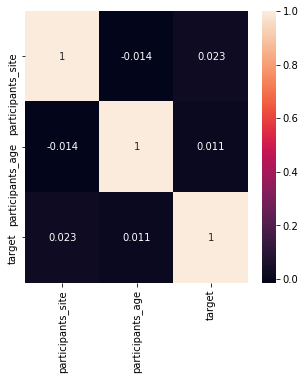

In [9]:
df = data[participant_info_cols + ['target', ]].corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(ax=ax, data=df, annot=True)

Distributions per target

In [66]:
is_asd = data['target'] == 1
is_not_asd = ~is_asd

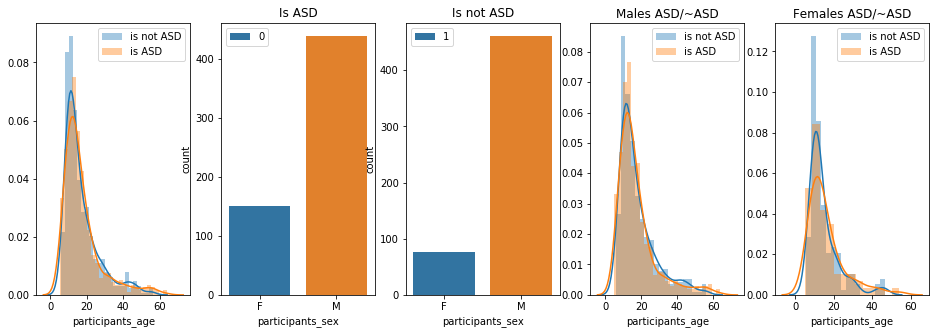

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(151)
sns.distplot(data[is_not_asd]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd]['participants_age'], label='is ASD')
plt.legend()

plt.subplot(152)
plt.title("Is ASD")
sns.countplot(x='participants_sex', data=data[is_not_asd], label='0')
plt.legend()

plt.subplot(153)
plt.title("Is not ASD")
sns.countplot(x='participants_sex', data=data[is_asd], label='1')
plt.legend()

is_male = data['participants_sex'] == 'M'

plt.subplot(154)
plt.title("Males ASD/~ASD")
sns.distplot(data[is_not_asd & is_male]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd & is_male]['participants_age'], label='is ASD')
plt.legend()

plt.subplot(155)
plt.title("Females ASD/~ASD")
sns.distplot(data[is_not_asd & (~is_male)]['participants_age'], label='is not ASD')
sns.distplot(data[is_asd & (~is_male)]['participants_age'], label='is ASD')

plt.legend()

## Brain anatomy 
#### Brain ventricle size:

In [64]:
accepted_anatomy = data['anatomy_select'] < 2

In [57]:
anatomy_ventricle_cols = [c for c in anatomy_info_cols if "ventricle" in c.lower()]
anatomy_ventricle_cols

['anatomy_Left-Lateral-Ventricle',
 'anatomy_3rd-Ventricle',
 'anatomy_4th-Ventricle',
 'anatomy_Right-Lateral-Ventricle',
 'anatomy_5th-Ventricle']

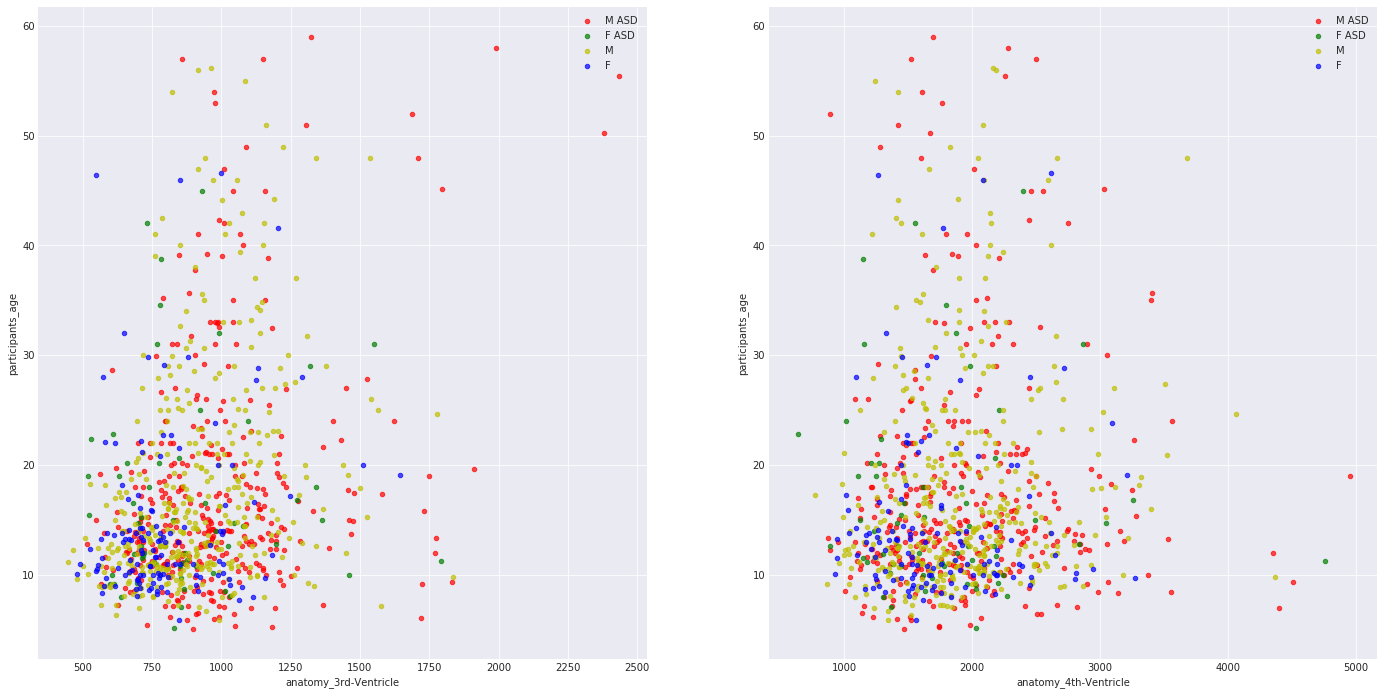

In [58]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & ~is_asd].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_3rd-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & ~is_asd].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_4th-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

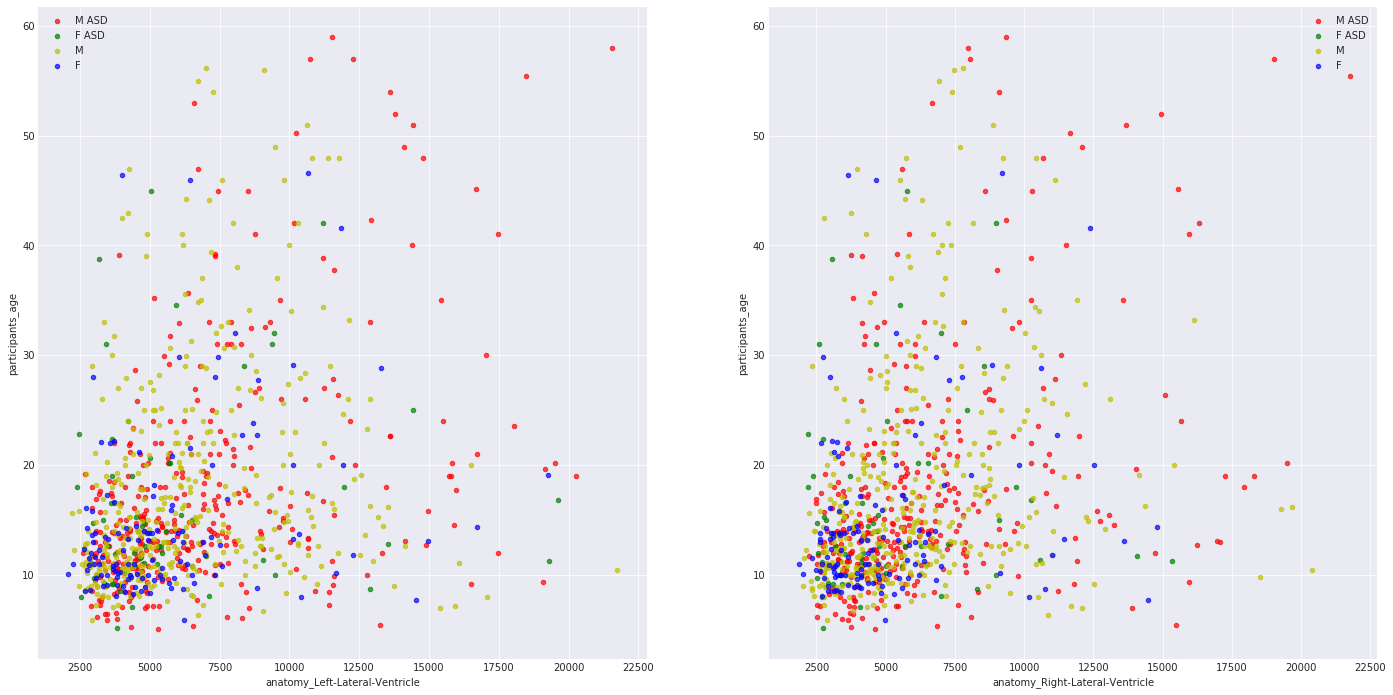

In [59]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_Left-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    data[accepted_anatomy & is_male & is_asd].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x='anatomy_Right-Lateral-Ventricle', y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [65]:
data.loc[:, "anatomy_sym-Lateral-Ventricle"] = data['anatomy_Left-Lateral-Ventricle'] / (data['anatomy_Right-Lateral-Ventricle'] + 1e-10)


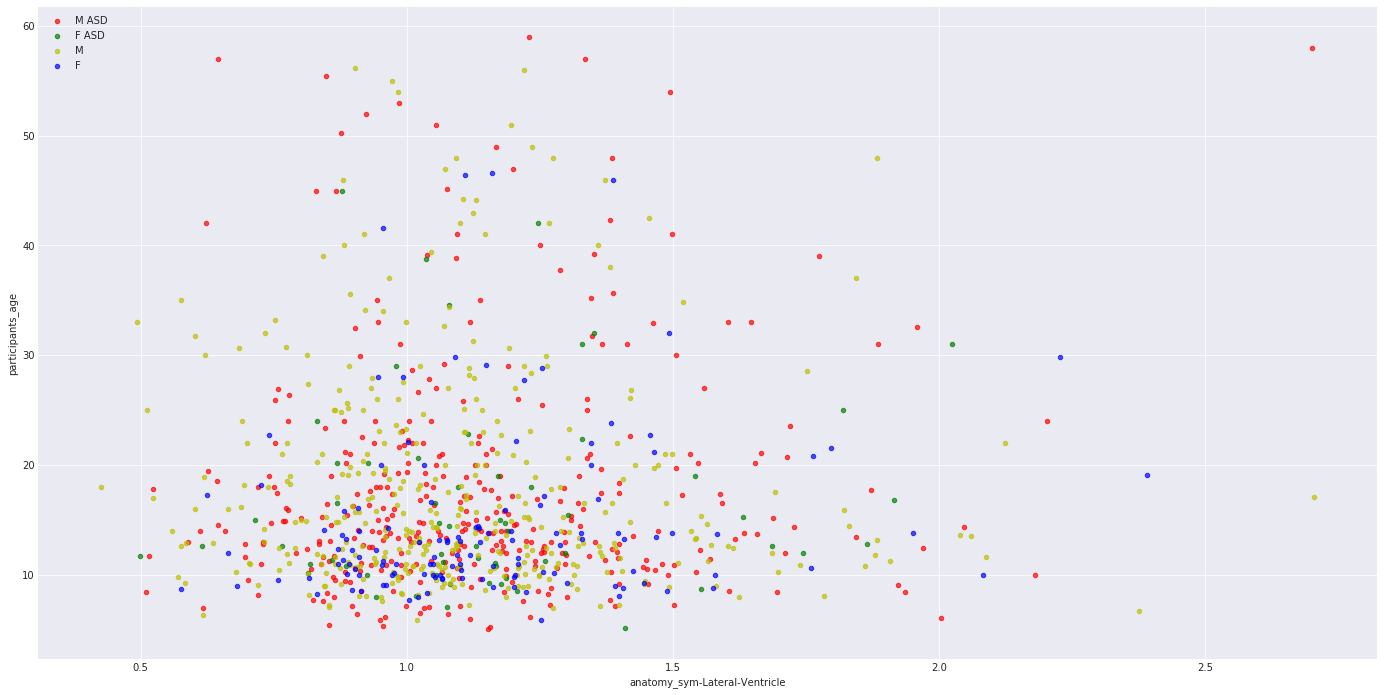

In [68]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = "anatomy_sym-Lateral-Ventricle"
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

### Lingual brain area

In [60]:
[c for c in anatomy_info_cols if "ling" in c]

['anatomy_lh_lingual_area',
 'anatomy_rh_lingual_area',
 'anatomy_lh_lingual_thickness',
 'anatomy_rh_lingual_thickness']

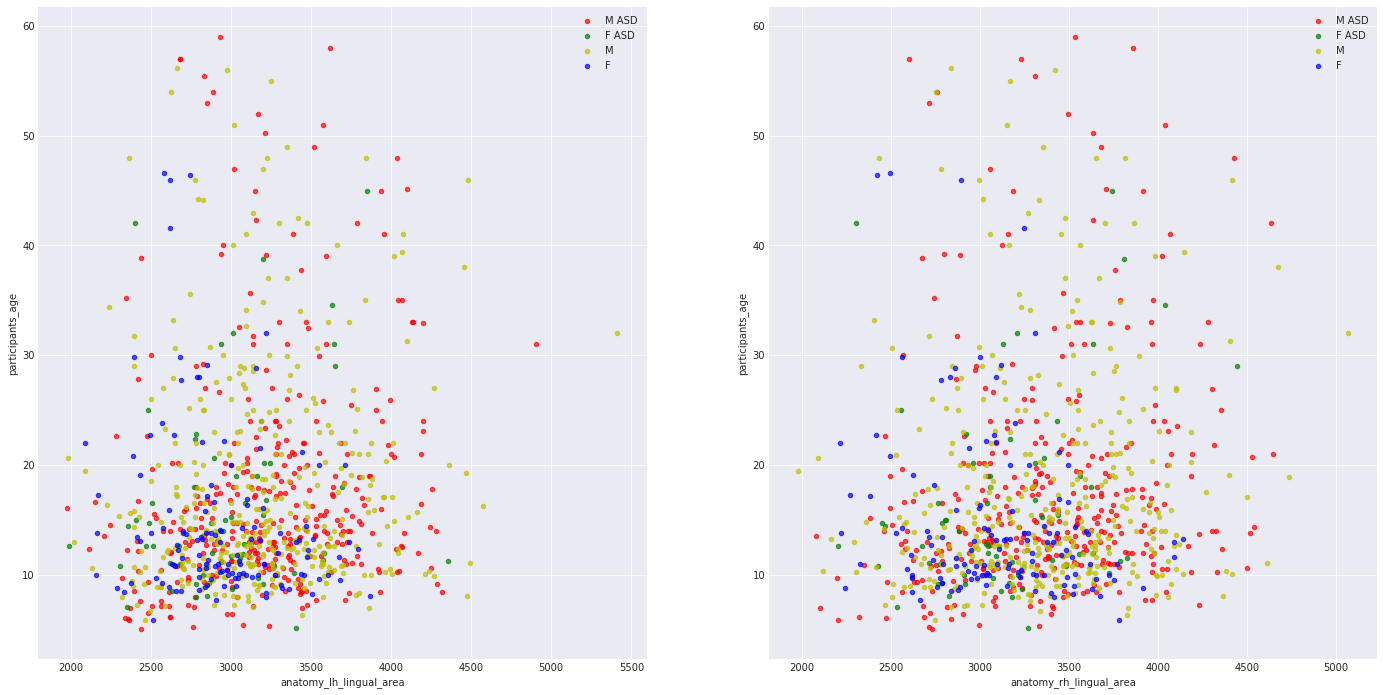

In [61]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [63]:
data.loc[:, 'anatomy_sym_lingual_area'] = data['anatomy_lh_lingual_area'] / (data['anatomy_rh_lingual_area'] + 1e-10)

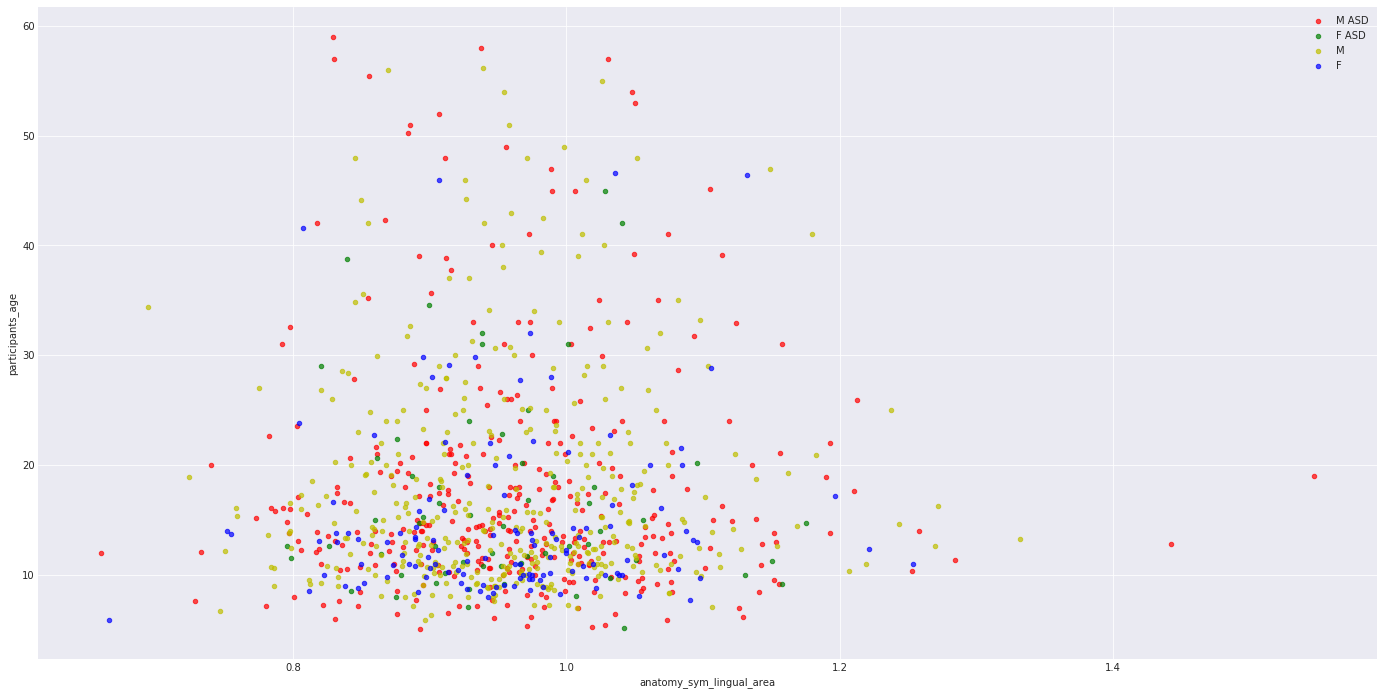

In [67]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = 'anatomy_sym_lingual_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

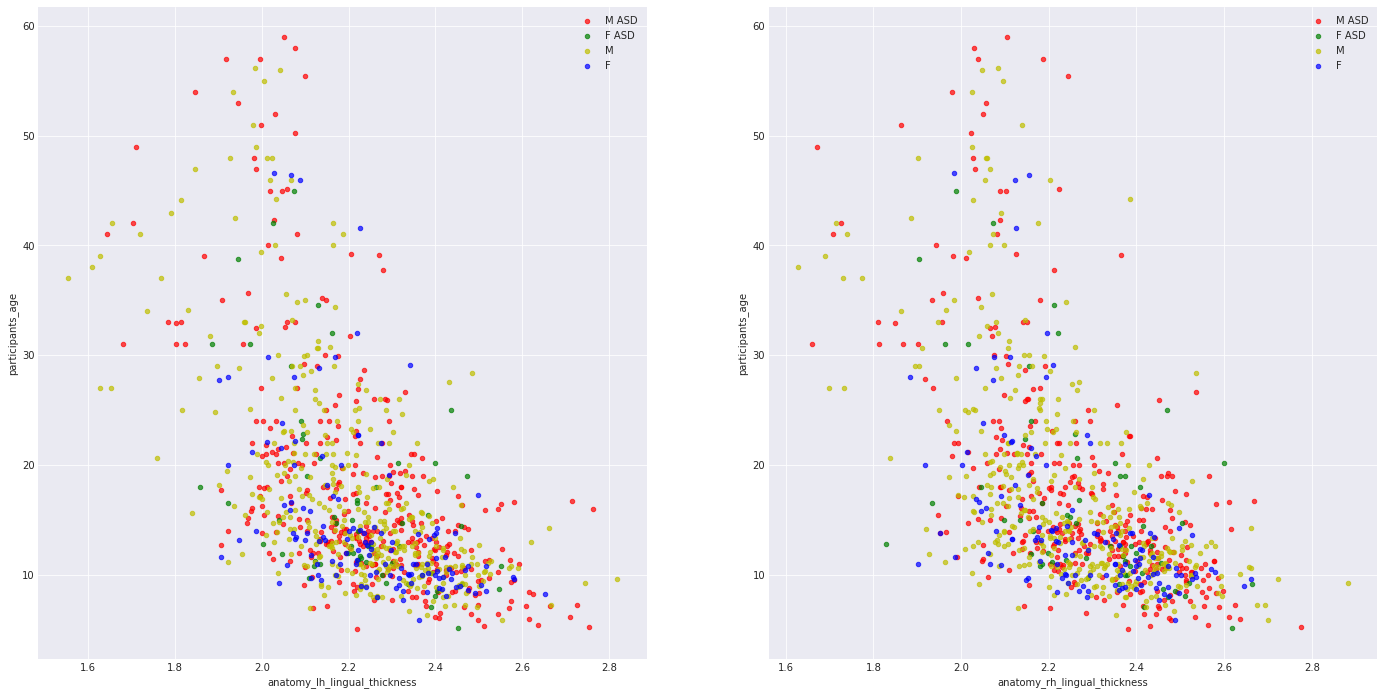

In [62]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [69]:
data.loc[:, 'anatomy_sym_lingual_thickness'] = data['anatomy_lh_lingual_thickness'] / (data['anatomy_rh_lingual_thickness'] + 1e-10)


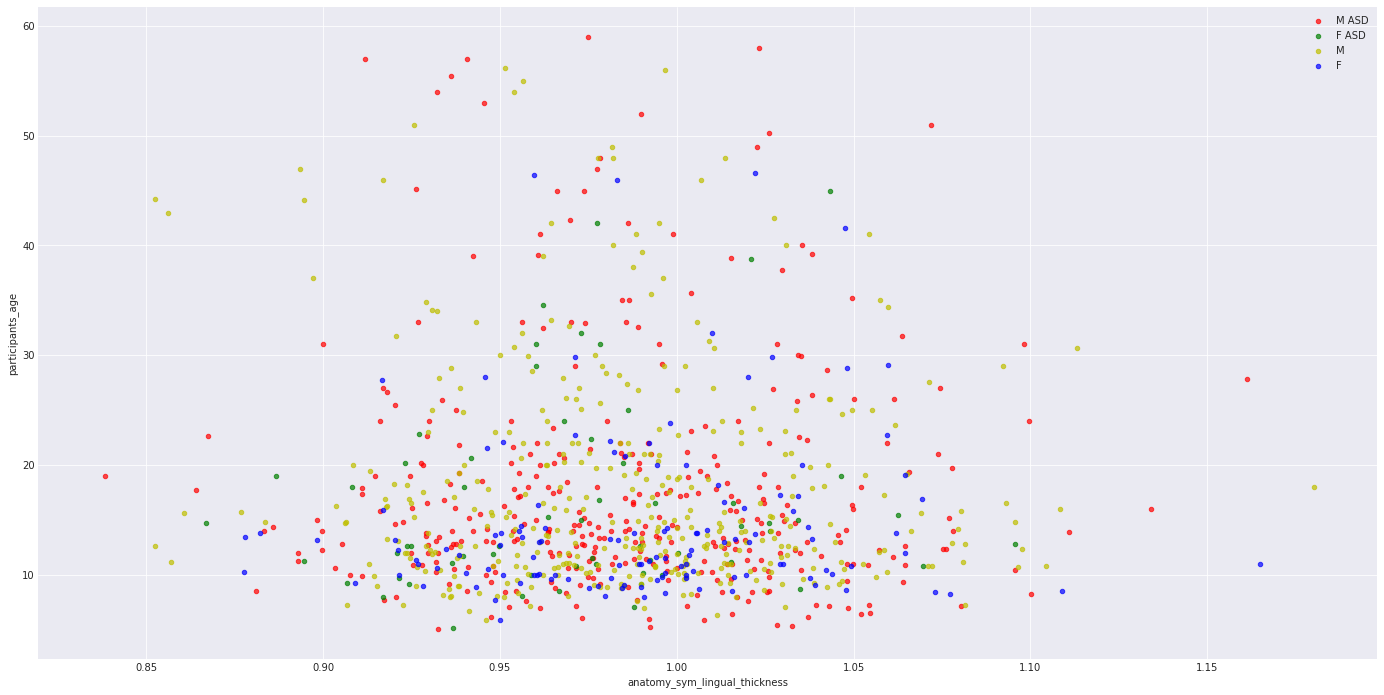

In [70]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col = 'anatomy_sym_lingual_thickness'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()


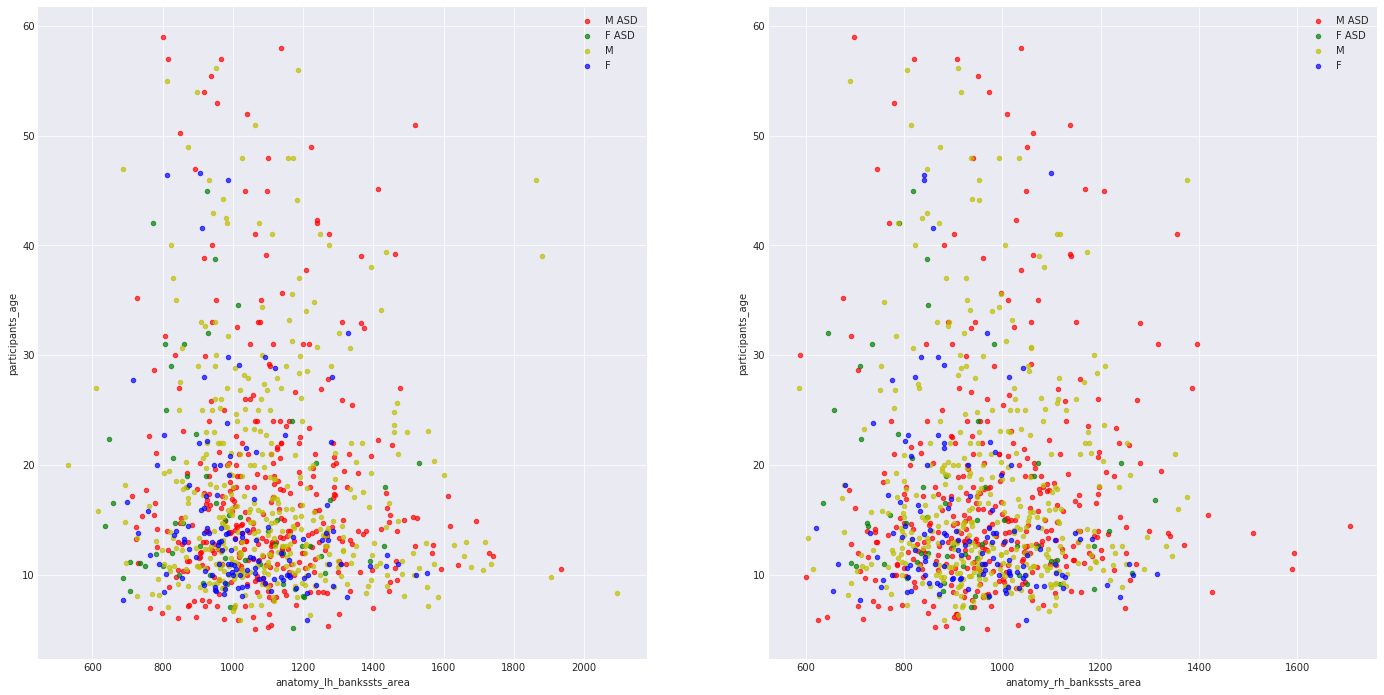

In [74]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(121)
    col = 'anatomy_lh_bankssts_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

    ax = plt.subplot(122)
    col = 'anatomy_rh_bankssts_area'    
    data[accepted_anatomy & is_male & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='r', label='M ASD', alpha=0.7)
    data[accepted_anatomy & (~is_male) & is_asd].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='g', label='F ASD', alpha=0.7)
    data[accepted_anatomy & is_male & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='y', label='M', alpha=0.7)
    data[accepted_anatomy & (~is_male) & (~is_asd)].plot(x=col, y='participants_age', kind='scatter', ax=ax, color='b', label='F', alpha=0.7)
    plt.legend()

In [61]:
data['participants_sex_int'] = data['participants_sex'].map({'F': -1.0, 'M': +1.0}) 
data.loc[:, 'participant sex/age'] = data['participants_sex_int'] / (1e-10 + data['participants_age'])

In [76]:
data.loc[:, 'participant sex 1/anatomy_BrainSegVolNotVent'] = 1e6 * data['participants_sex_int'] / (1e-10 + data['anatomy_BrainSegVolNotVent'])

In [82]:

data.loc[:, 'anatomy_rh_lingual_thickness anatomy_3rd-Ventricle'] = data['anatomy_3rd-Ventricle'] * data['anatomy_rh_lingual_thickness']
data.loc[:, 'anatomy_lh_cuneus_thickness anatomy_3rd-Ventricle'] = data['anatomy_3rd-Ventricle'] * data['anatomy_lh_cuneus_thickness']


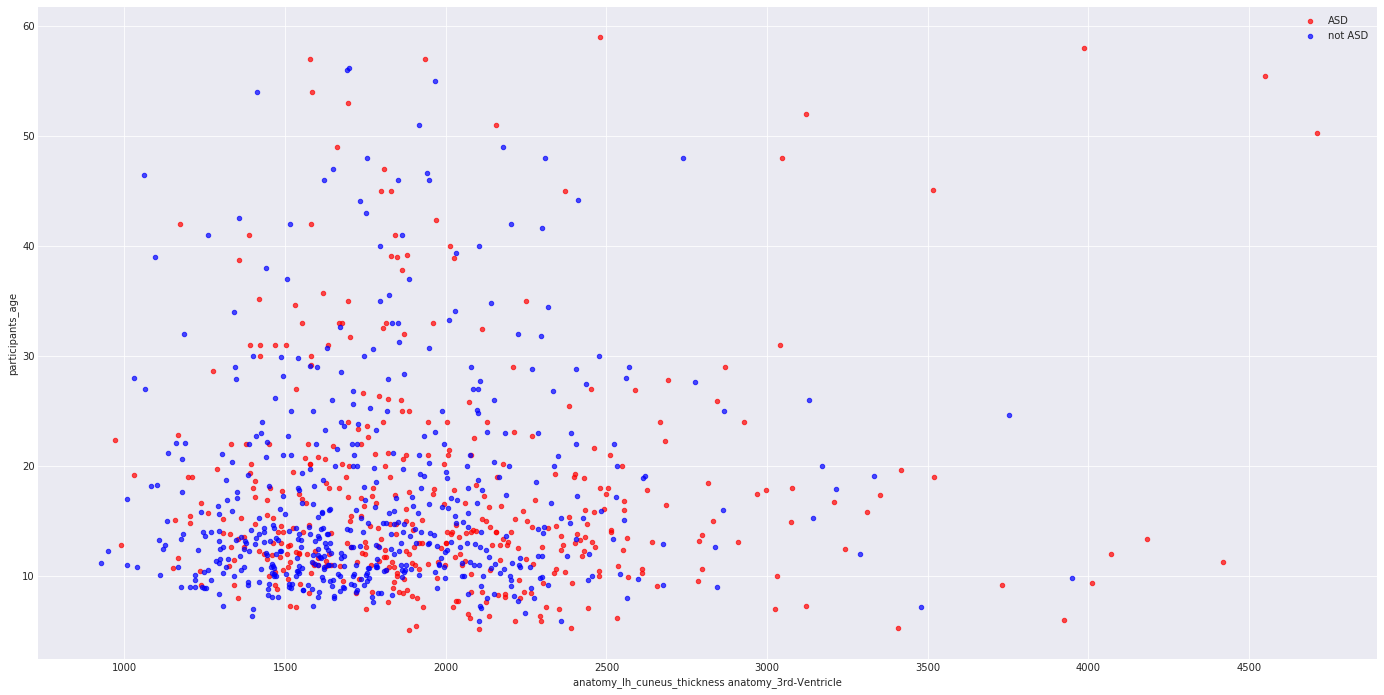

In [86]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col2 = 'participants_age'    
    col1 = 'anatomy_lh_cuneus_thickness anatomy_3rd-Ventricle'
    data[accepted_anatomy & is_asd].plot(x=col1, y=col2, kind='scatter', ax=ax, color='r', label='ASD', alpha=0.7)
    data[accepted_anatomy & (~is_asd)].plot(x=col1, y=col2, kind='scatter', ax=ax, color='b', label='not ASD', alpha=0.7)    
    plt.legend()


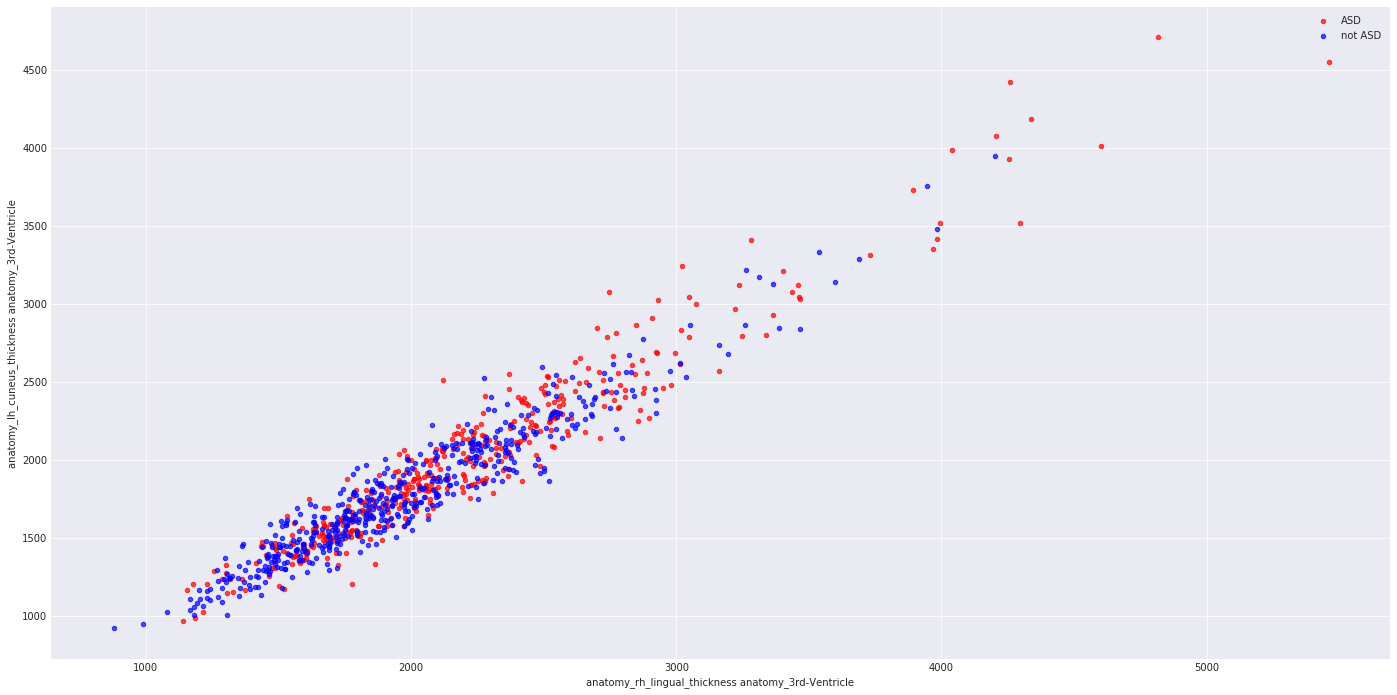

In [83]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col2 = 'anatomy_lh_cuneus_thickness anatomy_3rd-Ventricle'    
    col1 = 'anatomy_rh_lingual_thickness anatomy_3rd-Ventricle'
    data[accepted_anatomy & is_asd].plot(x=col1, y=col2, kind='scatter', ax=ax, color='r', label='ASD', alpha=0.7)
    data[accepted_anatomy & (~is_asd)].plot(x=col1, y=col2, kind='scatter', ax=ax, color='b', label='not ASD', alpha=0.7)    
    plt.legend()


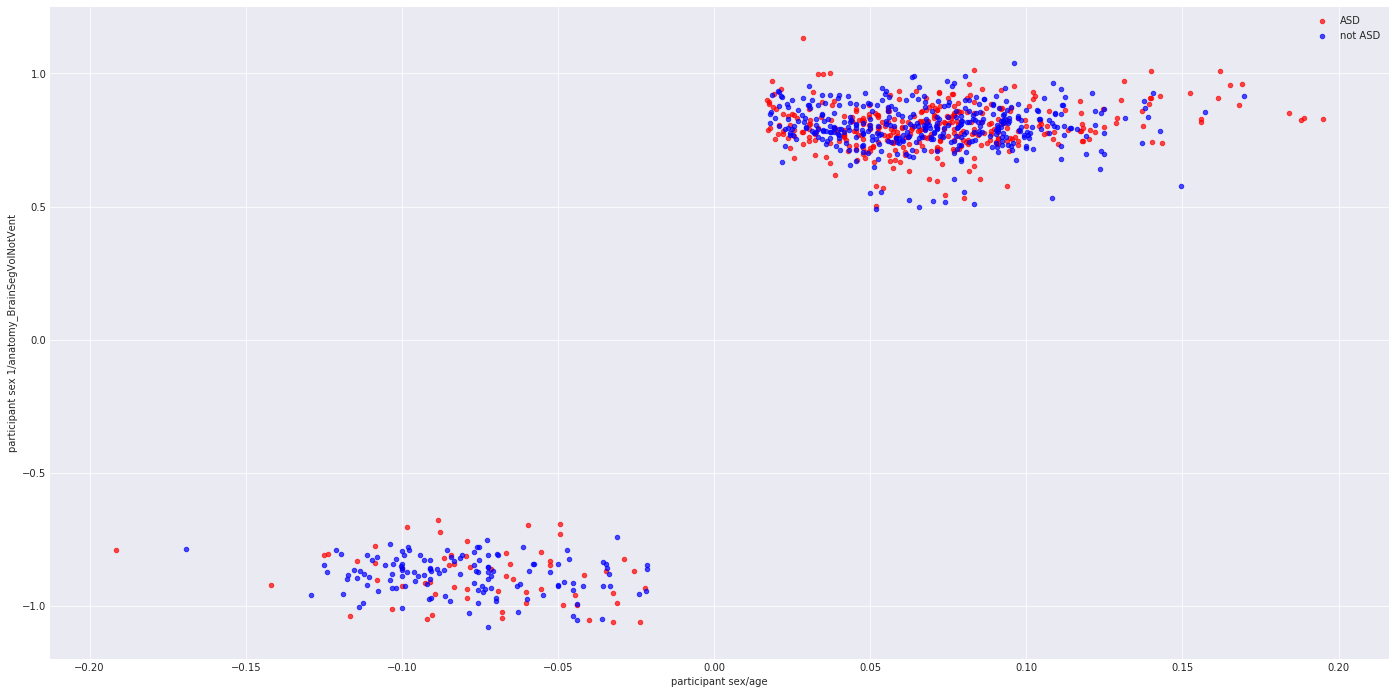

In [77]:
with sns.axes_style('darkgrid'):

    plt.figure(figsize=(24, 12))
    ax = plt.subplot(111)
    col1 = 'participant sex/age'    
    col2 = 'participant sex 1/anatomy_BrainSegVolNotVent'
    data[accepted_anatomy & is_asd].plot(x=col1, y=col2, kind='scatter', ax=ax, color='r', label='ASD', alpha=0.7)
    data[accepted_anatomy & (~is_asd)].plot(x=col1, y=col2, kind='scatter', ax=ax, color='b', label='not ASD', alpha=0.7)    
    plt.legend()


Explore PCA clusters

In [12]:
data_train['participants_sex'] = data_train['participants_sex'].map({'F': -1.0, 'M': +1.0}) 

In [40]:
anatomy_cols = [col for col in data_train.columns if col.startswith('anatomy')]
anatomy_cols.remove('anatomy_select')
null_anatomy_cols = [
    'anatomy_Left-WM-hypointensities',
    'anatomy_Right-WM-hypointensities',
    'anatomy_Left-non-WM-hypointensities',
    'anatomy_Right-non-WM-hypointensities'
]

for c in null_anatomy_cols:
    anatomy_cols.remove(c)

participant_cols = [col for col in data_train.columns if col.startswith('participant')]
participant_cols.remove('participants_site')

train_columns = anatomy_cols + participant_cols

In [41]:
len(train_columns)

205

In [7]:
from sklearn.decomposition import PCA

In [53]:
seed = 12
n_components = 75

pca = PCA(n_components=n_components, random_state=seed)

In [54]:
transformed_train_data = pca.fit_transform(data_train[train_columns].values)

In [55]:
pca_cols = ["pca_{}".format(i) for i in range(n_components)]
df = pd.DataFrame(transformed_train_data, columns=pca_cols)

df = pd.concat([df, pd.Series(labels_train, name='target')], axis=1)

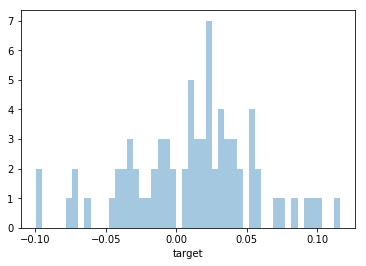

In [58]:
corr = df.corr()

sns.distplot(corr.loc['target', pca_cols], bins=50, kde=False)

In [71]:
# anatomy_param_area = [c for c in anatomy_info_cols if 'area' in c]

In [86]:
# anatomy_param_area

In [87]:
# len(anatomy_param_area)

In [88]:
# anatomy_info_cols

In [108]:
np.sort(data['participants_age'].astype(np.int).unique())

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 62, 64])

In [105]:
len(set(data[is_asd]['participants_site'].unique()) & set(data[~is_asd]['participants_site'].unique()))

32

In [106]:
len(data['participants_site'].unique())

34

In [91]:
data.loc[:, 'participants_age_int'] = data['participants_age'].astype(np.int)

In [107]:
data[data['participants_age_int'] == 6]['participants_site']

subject_id
12261741850773416433    1
10415768232462484879    1
14274245625610790172    1
5321826171820027980     7
15680715926403849325    1
6188401785713441824     1
17763617366950090014    8
5401026837067263159     1
1924621562516530754     7
10056200270967610506    8
16195331984964795597    7
13918139140392999025    8
17869103128191130311    1
543790797367970451      7
3579368566355607855     7
7625048414513408910     8
11376693238223767158    8
10208754341494896398    7
14268064505829803699    8
Name: participants_site, dtype: int64

## fsMRI data exploration

In [32]:
from nilearn.connectome import ConnectivityMeasure


def _load_fmri(fmri_filenames):
    """Load time-series extracted from the fMRI using a specific atlas."""
    return np.array([pd.read_csv("." + subject_filename,
                                 header=None).values
                     for subject_filename in fmri_filenames])


cm = ConnectivityMeasure(kind='tangent', vectorize=True)

In [33]:
fmri_filenames = data_train['fmri_msdl']
fmri = _load_fmri(fmri_filenames)

In [34]:
fmri.shape

(1127,)

In [35]:
cm_fmri = cm.fit_transform(fmri)

In [36]:
cm_fmri.shape

(1127, 780)

In [37]:
ConnectivityMeasure??